Iteracion 0: Par (0.35582345620583344,0.27398209583386823), valor funcion f(0.35582345620583344,0.27398209583386823): 0.0285124652689857
Iteracion 1: Par (0.355663194341295,0.273773962049197), valor funcion f(0.355663194341295,0.273773962049197): 0.0284435229680692
Iteracion 2: Par (0.355503247945825,0.273566173676956), valor funcion f(0.355503247945825,0.273566173676956): 0.0283748250584611
Iteracion 3: Par (0.355343616070604,0.273358729717953), valor funcion f(0.355343616070604,0.273358729717953): 0.0283063703867310
Iteracion 4: Par (0.355184297770758,0.273151629177093), valor funcion f(0.355184297770758,0.273151629177093): 0.0282381578062469
Iteracion 5: Par (0.355025292105342,0.272944871063357), valor funcion f(0.355025292105342,0.272944871063357): 0.0281701861771273
Iteracion 6: Par (0.354866598137314,0.272738454389782), valor funcion f(0.354866598137314,0.272738454389782): 0.0281024543661934
Iteracion 7: Par (0.354708214933521,0.272532378173437), valor funcion f(0.354708214933521

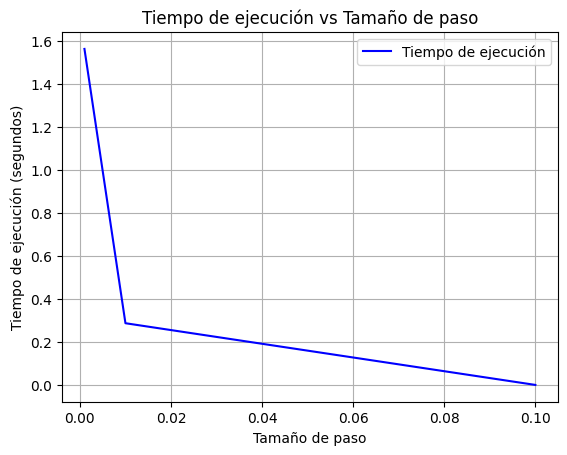

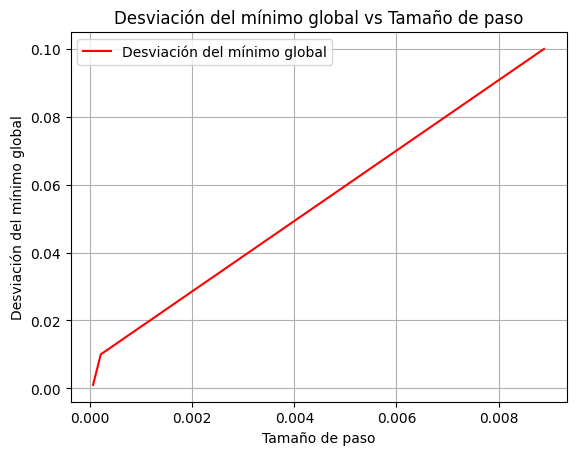

In [ ]:
#Ejercicio 1
import random
import time
import sympy as sp
import matplotlib.pyplot as plt

def time_procedure(f):
    def wrapper(*args, **kwargs):
        start = time.time()
        f(*args, **kwargs)
        end = time.time()
        print(f"Tiempo transcurrido: {end - start}")
    return wrapper
"""
¡explicacion!!!! : https://www.youtube.com/watch?v=A6FiCDoz8_4
https://www.freecodecamp.org/espanol/news/descenso-de-gradiente-ejemplo-de-algoritmo-de-aprendizaje-automaticod/
    Aquí está la fórmula para el descenso de gradiente: b = a - γ Δ f(a)
 https://github.com/vlarobbyk/descenso-por-gradiente/blob/master/GradientDescent-2.ipynb
 Paso 1: Seleccionar un punto inicial dentro del dominio de la funcion
 Paso 2: Calcular el gradiente de la funcion en el punto actual
 Paso 3: Actualizar punto actual moviendose en la direccion opuesta del gradiente
    (x_k+1, y_j+1) = (x_k,y_j) +  (alfa*gradiente en (x_k,y_j))
 Paso 4: repetir pasos 2 y 3 hasta llegar a un criterio de convergencia
"""
#Paso
dx = 0.001
dy = 0.001

#Umbral
umbral = 0.01

#Funcion
x ,y = sp.symbols('x y')
f = 3 * x**2 * y ** 2

@time_procedure
def minimizar_por_gradiente(f, paso_x,paso_y, cant_iteraciones):
    #Valores iniciales
    x_val = random.uniform(0,1)
    y_val  = random.uniform(0,1)

    #Derivadas Parciales
    df_dx = sp.diff(f, x)
    df_dy = sp.diff(f , y)

    for i in range(0 , cant_iteraciones):
        print(f"Iteracion {i}: Par ({x_val},{y_val}), valor funcion f({x_val:},{y_val}): {f.subs({x: x_val, y: y_val})}")
        #Gradiente en los puntos x, y
        gradiente_x = df_dx.subs({x: x_val, y: y_val})
        gradiente_y = df_dy.subs({x: x_val, y: y_val})

        #Multiplicamos el gradiente por el tamaño de paso
        alfa_gradiente_x = paso_x * gradiente_x
        alfa_gradiente_y = paso_y * gradiente_y

        #Calculamos el proximo punto
        x_val = x_val - alfa_gradiente_x
        y_val = y_val - alfa_gradiente_y



#Iteraciones
minimizar_por_gradiente(f,dx,dy,100)




## 3) No, no es posible realizar el ejercicio sobre una funcion que no es continua ya que en algun rango no se podria
# calcular las derivadas parciales para calcular el gradiente por lo que no se podria avanzar para ningun punto

# 4)

def minimizar_por_gradiente_grafico(f, paso_x,paso_y, threshold):
    i = 0
    #Valores iniciales
    x_val = random.uniform(0,1)
    y_val  = random.uniform(0,1)

    #Derivadas Parciales
    df_dx = sp.diff(f, x)
    df_dy = sp.diff(f , y)

    start = time.time()
    while f.subs({x: x_val, y: y_val}) > threshold:
        #Gradiente en los puntos x, y
        gradiente_x = df_dx.subs({x: x_val, y: y_val})
        gradiente_y = df_dy.subs({x: x_val, y: y_val})

        #Multiplicamos el gradiente por el tamaño de paso
        alfa_gradiente_x = paso_x * gradiente_x
        alfa_gradiente_y = paso_y * gradiente_y

        #Calculamos el proximo punto
        x_val = x_val - alfa_gradiente_x
        y_val = y_val - alfa_gradiente_y
        i+=1
    end = time.time()
    tiempo_ejecucion = end - start
    return tiempo_ejecucion, f.subs({x: x_val, y: y_val})



tiempos_acc = []

for j in range(1, 4):
    new_dx = 1/10**j
    new_dy = 1/10**j
    tiempo, resultado = minimizar_por_gradiente_grafico(f,new_dx,new_dy,umbral)
    desv:.4 = umbral - resultado
    tiempos_acc.append({'tiempo': tiempo,'paso': new_dx, 'desviacion': desv})

# Extraer datos para graficar
tiempos = [d['tiempo'] for d in tiempos_acc]
pasos = [d['paso'] for d in tiempos_acc]
desviaciones = [d['desviacion'] for d in tiempos_acc]

# Graficar tiempo de ejecución vs tamaño de paso
plt.plot(pasos, tiempos, c='blue', label='Tiempo de ejecución')
plt.xlabel('Tamaño de paso')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempo de ejecución vs Tamaño de paso')
plt.legend()
plt.grid(True)
plt.show()

# Graficar desviación del mínimo global vs tamaño de paso
plt.plot(desviaciones,pasos , c='red', label='Desviación del mínimo global')
plt.xlabel('Tamaño de paso')
plt.ylabel('Desviación del mínimo global')
plt.title('Desviación del mínimo global vs Tamaño de paso')
plt.legend()
plt.grid(True)
plt.show()






In [ ]:

# Ejercicio 2
def calcularMedia(datos: list):
    return sum(datos) / len(datos)

def sumarDatos(datos):
    return sum(datos)

def sumarProducto(datos_x, datos_y):
    to_ret = map(lambda x ,y: x * y, datos_x, datos_y)
    return sum(to_ret)

def cuadrado(x):
    return x**2

def sumarCuadrados(datos):
    to_ret = map(lambda x : x**2 ,datos)
    return sum(to_ret)

def calcularPendiente(sum_x, sum_y, sum_xy, sum_xx, n):
    return ((sum_xy - ((sum_x * sum_y) / n))/ (sum_xx - (sum_x**2 / n)))

def calcularInterseccion(media_x, media_y, pendiente):
    return media_y - (pendiente * media_x)

def trimCords(cords):
    pass
#Usamos los siguientes datos (1,2),(2,3),(3,5),(4,4),(5,6).
tupla_coord = [(1,2),(2,3),(3,5),(4,4),(5,6)]

datos_x = list(map(lambda point: point[0], tupla_coord))
datos_y = list(map(lambda point: point[1], tupla_coord))

media_x = calcularMedia(datos_x)
media_y = calcularMedia(datos_y)

sumatoria_x = sumarDatos(datos_x)
sumatoria_y = sumarDatos(datos_y)

suma_productos = sumarProducto(datos_x, datos_y)
sumar_cuadrados = sumarCuadrados(datos_x)

pendiente = round(calcularPendiente(sumatoria_x, sumatoria_y, suma_productos, sumar_cuadrados, len(datos_x)),1)

interseccion = round(calcularInterseccion(media_x, media_y, pendiente),1)

print(f"Los datos son X:{datos_x} Y:{datos_y}\n Las medias son X:{media_x} Y:{media_y} \n Las sumatorias son X:{sumatoria_x} Y:{sumatoria_y} XY: {suma_productos} X²:{sumar_cuadrados}")
print(f" Pendiente es: {pendiente}")
print(f" Interseccion es: {interseccion}")

print(f"Por lo tanto la ecuacion de la recta es Y = {pendiente}X + {interseccion}")




Los datos son X:[1, 2, 3, 4, 5] Y:[2, 3, 5, 4, 6]
 Las medias son X:3.0 Y:4.0 
 Las sumatorias son X:15 Y:20 XY: 69 X²:55
 Pendiente es: 0.9
 Interseccion es: 1.3
Por lo tanto la ecuacion de la recta es Y = 0.9X + 1.3


1


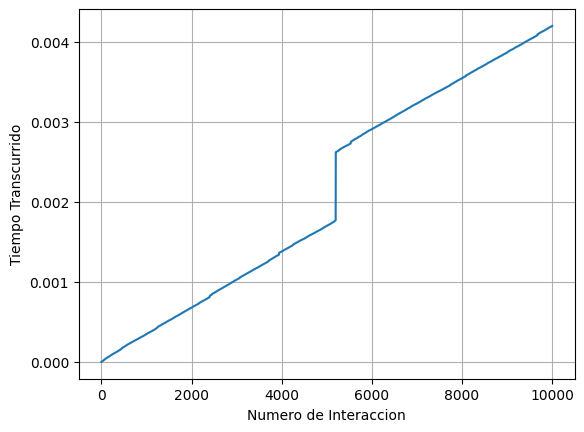

In [ ]:
#Ejercicio 3
import random
import matplotlib.pyplot as pplt
import time

def encontrarValor(n, k):
    return n % k

array_aleatorio = [random.randint(100000, 10000000000000) for _ in range(10000)]

valor = encontrarValor(73,3)

print(valor)

tiempo_acu = [(0,0)]
inicio_global = 0


for i,_ in enumerate(array_aleatorio):
    inicio = time.time()
    encontrarValor(array_aleatorio[i], 3)
    fin = time.time()
    inicio_global = inicio_global + (fin - inicio)
    tiempo_acu.append((i+1,inicio_global))


iter_number, accum_time = zip(*tiempo_acu)

pplt.plot(iter_number, accum_time)

pplt.xlabel("Numero de Interaccion")
pplt.ylabel("Tiempo Transcurrido")

pplt.grid(True)
pplt.show()




In [ ]:
#Ejercicio 4

import math
import pandas as pd
from google.colab import drive

datos = {
    'Nombre': ['Ana', 'Pedro', 'Julia', 'Luis'],
    'Apellido': ['Perez', 'Gomez', 'Martinez', 'Fernandez'],
    'Edad': [20, 22, 21, 23],
    'Nivel educativo': ['Primaria', 'Secundaria', 'Universitario', 'Primaria']
}

df = pd.DataFrame(datos)

def TransformDataToSend(df) -> pd.DataFrame:
    #Paso 1
    if 'Edad' in df.columns:
        df['Edad'] = df['Edad'].apply(lambda x: math.log10(x) if x > 0 else 0)

    #Paso 2
    if len(df.columns) > 10:
        df = df.iloc[:, :10]

    #Paso 3
    mapa_ordinal = {
        'Primaria': 0,
        'Secundaria': 1,
        'Universitario': 2
    }
    df['Nivel educativo'] = df['Nivel educativo'].map(mapa_ordinal)

    #Paso4
    df.columns = df.columns.str.lower()

    return df

def exportToGoogleDrive(dfram):

    # Conectar a Google Drive
  drive.mount('/content/gdrive')

  # Guardar el DataFrame a un archivo de Excel en Google Drive
  dfram.to_excel('/content/gdrive/My Drive/{}.xlsx'.format('Tp1IA'), index=False)


to_store = TransformDataToSend(df)
exportToGoogleDrive(to_store)



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
